In [5]:
%pwd

'C:\\Users\\tretec'

# partie 1 Data Preprocessing 


In [85]:
import numpy as np
import pandas as pd
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [86]:
df=pd.read_csv("kc_house_data.csv",encoding="ISO-8859-1")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [87]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [88]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [89]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [90]:
df.shape

(21613, 21)

In [91]:
df.size

453873

In [92]:
df.ndim

2

In [93]:
df.drop(["id", "view", "sqft_lot15", "zipcode", "sqft_living15" ], axis=1 , inplace=True)

In [94]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,47.5112,-122.257
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,47.7210,-122.319
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,47.7379,-122.233
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,47.5208,-122.393
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,47.6168,-122.045


# Partie 2 Data Visualization 

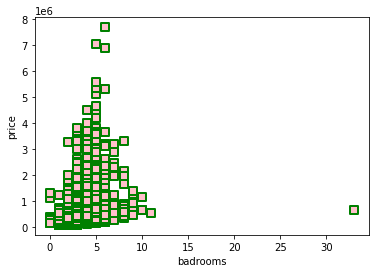

In [95]:
plt.scatter(df["bedrooms"], df["price"], c ="pink",linewidths = 2, marker ="s", edgecolor ="green",s = 50)
plt.xlabel("badrooms")
plt.ylabel("price")
plt.show()

In [96]:
df["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [97]:
indexname=df[df["bedrooms"]==33].index
df.drop(indexname ,inplace=True)

In [98]:
df["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

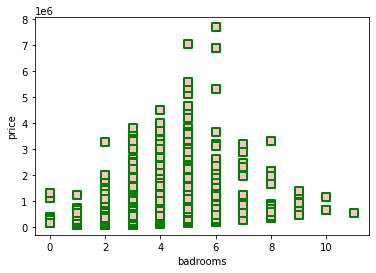

In [99]:
plt.scatter(df["bedrooms"], df["price"], c ="pink",linewidths = 2, marker ="s", edgecolor ="green",s = 50)
plt.xlabel("badrooms")
plt.ylabel("price")
plt.show()

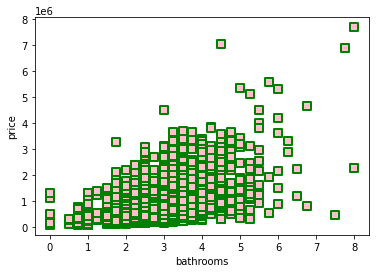

In [100]:
plt.scatter(df["bathrooms"], df["price"], c ="pink",linewidths = 2, marker ="s", edgecolor ="green",s = 50)
plt.xlabel("bathrooms")
plt.ylabel("price")
plt.show()

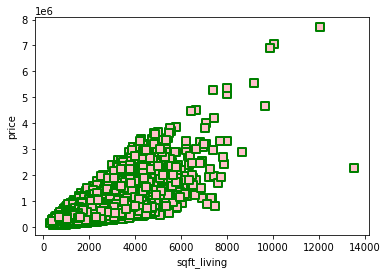

In [101]:
plt.scatter(df["sqft_living"], df["price"], c ="pink",linewidths = 2, marker ="s", edgecolor ="green",s = 50)
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.show()

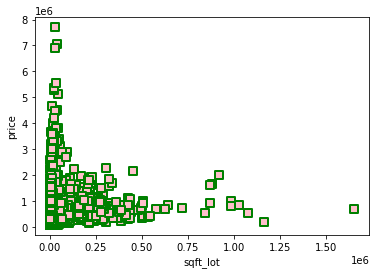

In [102]:
plt.scatter(df["sqft_lot"], df["price"], c ="pink",linewidths = 2, marker ="s", edgecolor ="green",s = 50)
plt.xlabel("sqft_lot")
plt.ylabel("price")
plt.show()

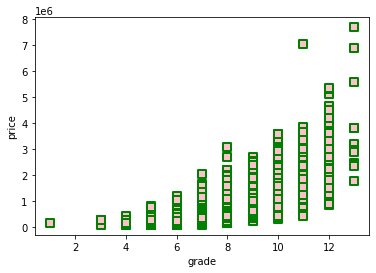

In [103]:
plt.scatter(df["grade"], df["price"], c ="pink",linewidths = 2, marker ="s", edgecolor ="green",s = 50)
plt.xlabel("grade")
plt.ylabel("price")
plt.show()

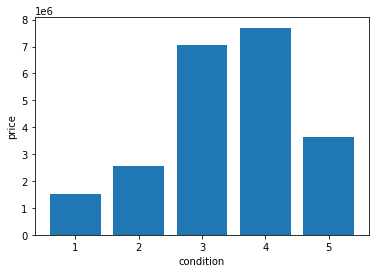

In [104]:
plt.bar(df["condition"],df["price"])
plt.xlabel("condition")
plt.ylabel("price")
plt.show()

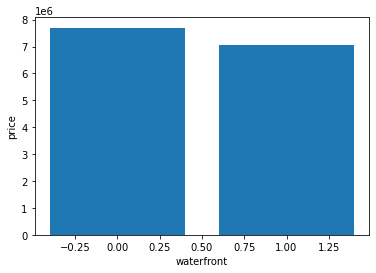

In [105]:
plt.bar(df["waterfront"],df["price"])
plt.xlabel("waterfront")
plt.ylabel("price")
plt.show()

In [106]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(corr,cmap = cmap,square=True,cbar_kws={ 'shrink' : .9 },ax=ax,annot = True,annot_kws = { 'fontsize' : 12 })

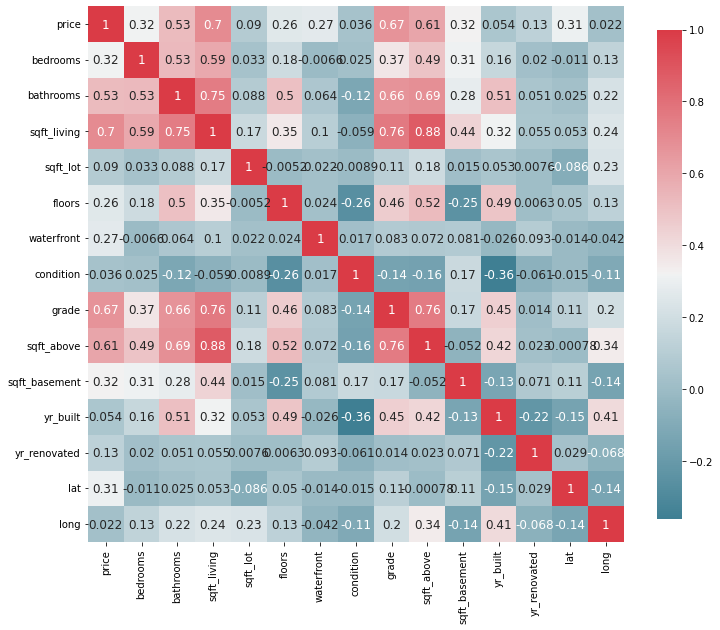

In [107]:
plot_correlation_map( df )

In [108]:
x=df["bedrooms"].values[:,np.newaxis]
y=df["price"].values

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)

In [110]:
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)

In [111]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 107900926423.52058
R squared 0.10706392457812208


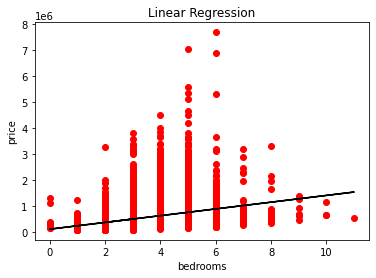

In [112]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("bedrooms")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [113]:
x=df["bathrooms"].values[:,np.newaxis]
y=df["price"].values

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)

In [115]:
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)

In [116]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 87511819093.82138
R squared 0.2757943524233497


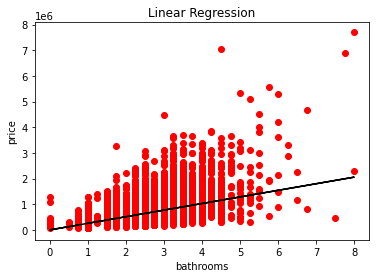

In [117]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("bathrooms")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [118]:
x=df["sqft_living"].values[:,np.newaxis]
y=df["price"].values

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)

In [120]:
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)

In [121]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 61564905072.466125
R squared 0.49051851044028605


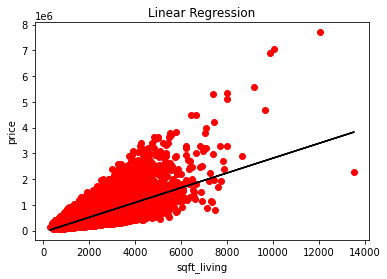

In [122]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [123]:
x=df["sqft_lot"].values[:,np.newaxis]
y=df["price"].values

In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)

In [125]:
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)

In [126]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 119913137274.84431
R squared 0.007656655611588015


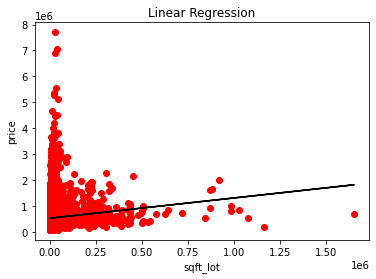

In [127]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_lot")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [128]:
x=df[["sqft_lot","sqft_living","bathrooms","bedrooms"]]
y=df["price"].values

In [129]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)

In [130]:
model=LinearRegression()
model.fit(x_train,y_train) 
predicted=model.predict(x_test)

In [131]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 60123768509.62882
R squared 0.5024446622280467


In [134]:
x= df["sqft_lot"].values.reshape(-1,1)
y= df["price"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

LinearRegression()

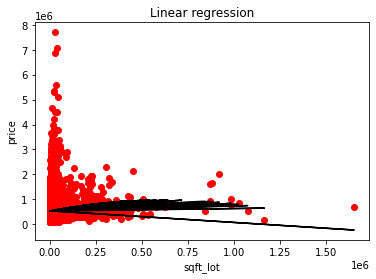

In [135]:
plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("price")
plt.xlabel("sqft_lot")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k")

In [136]:
x= df["sqft_living"].values.reshape(-1,1)
y= df["price"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y)

LinearRegression()

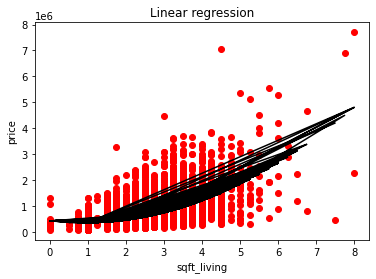

In [140]:
plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k")

In [141]:
x= df["bathrooms"].values.reshape(-1,1)
y= df["price"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y)

LinearRegression()

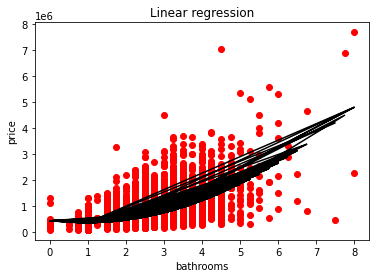

In [142]:
plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("price")
plt.xlabel("bathrooms")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k")

In [144]:
x= df["bedrooms"].values.reshape(-1,1)
y= df["price"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y)

LinearRegression()

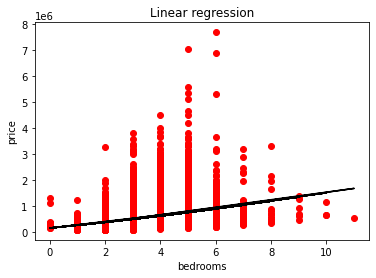

In [145]:
plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("price")
plt.xlabel("bedrooms")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k")